In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
path = r"D:\MyProjects\Python\Andrew Ng_ML_Exercise\python代码\ex2-logistic regression\ex2data1.txt"
raw_data = pd.read_csv(path,sep="," ,names=("score1","score2","result"))
raw_data.info

<bound method DataFrame.info of        score1     score2  result
0   34.623660  78.024693       0
1   30.286711  43.894998       0
2   35.847409  72.902198       0
3   60.182599  86.308552       1
4   79.032736  75.344376       1
..        ...        ...     ...
95  83.489163  48.380286       1
96  42.261701  87.103851       1
97  99.315009  68.775409       1
98  55.340018  64.931938       1
99  74.775893  89.529813       1

[100 rows x 3 columns]>

In [13]:
data = raw_data
data.head()

,score1,score2,result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


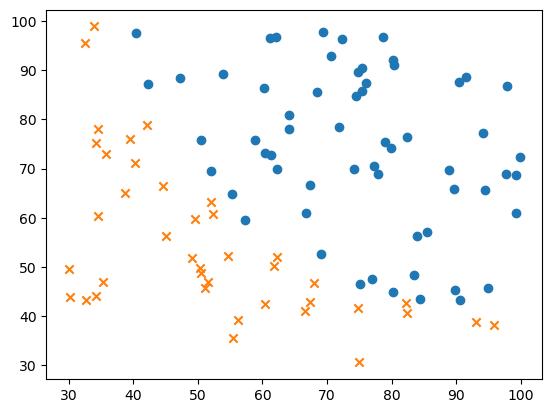

In [14]:
# Get a subplot object
ax = plt.subplot()

# Filter the data to get the scores of the students who passed
score_pass = raw_data[raw_data["result"]==1]

# Filter the data to get the scores of the students who didn't pass
score_deny = raw_data[raw_data["result"]==0]

# Plot the scores of the students who passed with 'o' markers
ax.scatter(score_pass["score1"],score_pass["score2"],marker= "o")

# Plot the scores of the students who didn't pass with 'x' markers
ax.scatter(score_deny["score1"],score_deny["score2"], marker="x")

# Display the plot
plt.show()

In [15]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
sigmoid(5)

0.9933071490757153

In [88]:
theta = np.zeros(3)
theta

array([0., 0., 0.])

In [70]:
# Define a function to get the feature matrix X from the data
def get_x(data):
    # Normalize the data by subtracting the mean and dividing by the standard deviation
    data = data.apply(lambda column:(column-column.mean())/column.std())
    # Convert the data to a numpy array
    X = data.to_numpy()
    # Insert a column of ones at the beginning of the array for the bias term
    X = np.insert(X,obj=0,values=1,axis=1)
    # Delete the last column of the array (the 'result' column)
    X = np.delete(X,obj=-1,axis=1)
    # Return the feature matrix
    return X

# Define a function to get the target vector y from the data
def get_y(data):
    # Return the 'result' column as a numpy array
    return data["result"].to_numpy()

# Get the feature matrix X from the data
X = get_x(data)

# Get the target vector y from the data
y = get_y(data)

In [90]:
# Define a function to calculate the cost
def cost(theta, X, y):
    # Get the number of training examples
    m = X.shape[0]
    # Calculate the cost using the logistic regression cost function formula
    cost_value = (1/m)*(-y@np.log(sigmoid(X@theta)) - (1-y)@np.log(1-sigmoid(X@theta))).mean()
    # Return the cost
    return cost_value

# Call the cost function with the initial theta, feature matrix X, and target vector y
cost(theta, X, y)

0.6931471805599452

In [98]:
# Define a function to calculate the gradient
def gradient(theta, X, y):
    # Get the number of training examples
    m = X.shape[0]
    # Expand the dimensions of y to make it a 2D array
    y = y[:, np.newaxis]
    # Expand the dimensions of theta to make it a 2D array
    theta = theta[:, np.newaxis]
    # Calculate the gradient using the logistic regression gradient formula
    return (1/m)*((sigmoid(X@theta)-y).T@X).flatten()

# Call the gradient function with the initial theta, feature matrix X, and target vector y
gradient(theta, X, y)

array([-0.1       , -0.27981946, -0.24972806])

In [99]:
# Import the optimize module from scipy, which provides functions for minimizing or maximizing objective functions.
from scipy import optimize

# Use the minimize function from the optimize module.
# This function minimizes a scalar function of one or more variables.
res = optimize.minimize(fun=cost, args=(X,y),x0=theta ,method='Newton-CG', jac=gradient)

     fun: 0.20349770158961694
     jac: array([ 3.30057041e-09, -2.76808625e-08, -4.07497604e-08])
 message: 'Optimization terminated successfully.'
    nfev: 9
    nhev: 0
     nit: 8
    njev: 31
  status: 0
 success: True
       x: array([1.71844725, 4.01289721, 3.74389778])

In [101]:
# Define a function to predict the class of an instance based on its features and the theta values
def predict(X,theta):
    # Calculate the probability that the instance belongs to class 1
    prob = sigmoid(X@theta)
    # If the probability is greater than or equal to 0.5, predict class 1, otherwise predict class 0
    return (prob>=0.5).astype(int)

# Get the optimal theta values from the result of the optimization
final_theta = res.x[:,np.newaxis]

In [113]:
# Import the classification_report function from sklearn.metrics. This function builds a text report showing the main classification metrics.
from sklearn.metrics import classification_report

# Use the predict function to predict the classes of the instances in the feature matrix X
pre_y = predict(X,final_theta)

# Expand the dimensions of y to make it a 2D array
bef_y = y[:,np.newaxis]

# Use the classification_report function to generate a report of the main classification metrics. The report includes precision, recall, f1-score, and support for each class.
print(classification_report(bef_y, pre_y))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.90      0.92      0.91        60

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



In [114]:
print(res.x)

[1.71844725 4.01289721 3.74389778]
